# Generadores
## Programación para Analítica de Datos
## Mtra. Gisel Hernández Chávez

### Contenido principal
+ Sintaxis de expresión generadora
+ Ejemplos
+ Ejercicios
+ Función generadora para producir iteradores
+ Diferencia entre funciones generadoras y funciones que usan return 


## Generadores

+ La característica fundamental que otorga a las funciones del generador sus __"superpoderes"__ es la capacidad de pausar una función del generador y luego reanudarla en cualquier momento desde cualquier función. 
+ El estado local de la función del generador se mantiene intacto después de que la función se pausa y está disponible cuando la función se reanuda nuevamente. 

__¿Cómo es eso posible? ¿Cómo se puede pausar una función y luego reanudarla manteniendo intacto su estado local?__

+ Por lo que sabemos, las funciones tienen un único punto de entrada y múltiples puntos de salida (declaraciones de retorno). Cada vez que llamamos a una función, el código se ejecuta comenzando desde la primera línea de la función hasta que encuentra un punto de salida. En ese momento, el control se devuelve al llamador de la función y la pila de variables locales de la función se borra y el sistema operativo recupera la memoria asociada.

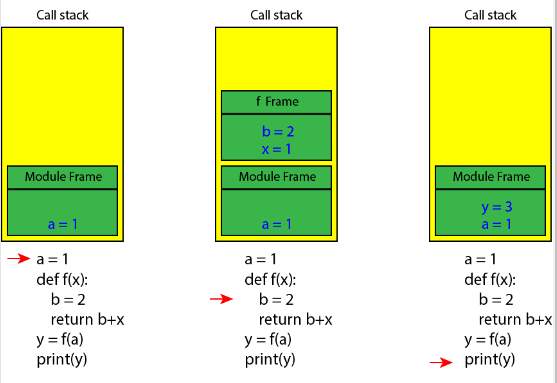

+ Las funciones generadoras no se comportan de esta manera. 
+ Tienen múltiples puntos de entrada y salida. 
+ Cada declaración __yield__ en una función generadora define simultáneamente un punto de salida y un punto de reentrada.
+ La ejecución de una función generadora continúa hasta que se encuentra una declaración __yield__. En ese punto, el estado local de la función se conserva y el flujo de control se cede al llamador de la función generadora. Cuando se reanuda la función del generador (llamando a next, send o iterando a través de un bucle for), se evoca su último estado local conocido y la ejecución comienza desde la línea que sigue a la declaración __yield__ en la que se pausó por última vez la función del generador.
+ Este comportamiento es bastante alucinante y no se ajusta al comportamiento normal de las funciones.


Los generadores son una clase especial de funciones que __simplifican la tarea de escribir iteradores__. Las funciones regulares calculan un valor y lo devuelven, pero los generadores devuelven un iterador que devuelve un flujo de valores.

Sin duda, está familiarizado con cómo funcionan las llamadas a funciones regulares en Python. 
+ Cuando llama a una función, obtiene un espacio de nombres privado donde se crean sus variables locales. 



+ Cuando la función alcanza una declaración de retorno, las variables locales se destruyen y el valor se devuelve al llamador.
+ Una llamada posterior a la misma función crea un nuevo espacio de nombres privado y un nuevo conjunto de variables locales.

Pero, ¿qué pasa si las variables locales no se descartan al salir de una función? ¿Qué pasaría si luego pudiera reanudar la función donde la dejó? Esto es lo que proporcionan los generadores; se pueden considerar como funciones reanudables.

In [1]:
def generate_ints(N):
    for i in range(N):
        yield i

+ Cualquier función que contenga una __palabra clave yield__ es una función generadora.

+ Cuando llamas a una función de generador, no devuelve un solo valor; en su lugar, devuelve un objeto generador que admite el protocolo de iterador. 
+ Al ejecutar la expresión yield, el generador genera el valor de i, similar a una declaración return. La gran diferencia entre yield y return es que al alcanzar un rendimiento se suspende el estado de ejecución del generador y se conservan las variables locales. En la próxima llamada al método __next __ () del generador, la función continuará ejecutándose.

In [2]:
gen = generate_ints(3)
gen  

<generator object generate_ints at 0x000001D222E5AEA0>

In [3]:
type(gen)

generator

In [3]:
# Se puede hacer una lista a partir de un objeto generador
print(list((pow(i, 2) for i in range(1, 5))))

[1, 4, 9, 16]


In [4]:
from collections.abc import Iterable, Iterator
isinstance(gen, Iterator)

True

In [5]:
# probar si es iterable de dos formas
hasattr(gen,'__iter__'), isinstance(gen, Iterator)

(True, True)

In [6]:
next(gen)

0

In [7]:
next(gen)

1

In [8]:
next(gen)

2

In [9]:
next(gen) # se agotó el iterador

StopIteration: 

In [ ]:
a, b, c = generate_ints(3)
print(a,b,c)

### Generadores finitos

#### Factores primos de un número

+ Se añaden a un conjunto (set) que no tiene repeticiones.  
+ No es un generador infinito.  

In [10]:
# encuentra los factores primos de un número
def prime_factor(n):
    '''encuentra los factores primos de n'''
    factores = set()
    if n % 2 == 0:
        factores.add(2)
        yield 2
    #si uso n**0.5 no encuentra el 3 y el 5 para el caso de n=15
    for f in range(3, n // 2 + 1, 2): 
        if n % (f) == 0:
            factores.add(f)
            yield f
        f += 1

L_factores = set()

for i in prime_factor(14):
    L_factores.add(i)
    print(i)


2
7


In [11]:
for i in prime_factor(15):
    print(i)

3
5


In [12]:
for i in prime_factor(10):
    print(i)

2
5


In [13]:
factores  # es local a la función  # es variable local; no se conocen los valores fuera del scope de la función

NameError: name 'factores' is not defined

In [14]:
# Conjunto con todos los factores primos que se van encontrando
L_factores

{2, 7}

#### Generador en rango

In [ ]:
# Generador infinito de múltiplos de 3
def generate_inf_mul_3():
    cont = 3
    while True:
        yield cont
        cont += 3

## Ejemplo de expresión generadora

+ Es una comprensión escrita entre paréntesis: no creer que es una tupla por comprensión
+ Normalmente se usa en un ciclo for
+ Recordar que str.strip(self, chars=None, /) devuelve una copia de la cadena sin los espacios en blanco iniciales y finales. Si se proporciona chars y no None, elimina los caracteres en chars.

In [15]:
line_list = ['  line 1\n', 'line 2  \n','tercer_elemento']  # lista de cadenas

# La expresión generadora retorna un iterador
# Note que va encerrada entre paréntesis
stripped_iter = (line.strip() for line in line_list)  # se crea objeto de tipo generator

type(stripped_iter )  # informa que es del tipo generator (un tipo de iterator)



generator

In [16]:
for i in line_list:
    print(i)

  line 1

line 2  

tercer_elemento


In [17]:
stripped_iter2 = (line.strip(' ') for line in line_list)
for i in stripped_iter2:
    print(i)

line 1

line 2  

tercer_elemento


## Itertools

In [1]:
import itertools

In [3]:
ciclo = itertools.cycle('esta es una prueba')

for _ in range(10):
    print(next(ciclo))

e
s
t
a
 
e
s
 
u
n


## Algo parecido a una tupla por comprensión

+ No existen las tuplas por comprensión en Python. Se puede crear algo similar como en el siguiente ejemplo:

In [18]:
(x**2 for x in lista_num)

NameError: name 'lista_num' is not defined

In [19]:
lista_num = [1, 2, 3, 4, 5, 5,7]
# convertir a tupla el resultado de una expresión generadora
cuadrados = tuple(x**2 for x in lista_num)
cuadrados  

(1, 4, 9, 16, 25, 25, 49)

In [20]:
# La lista por comprensión retorna una lista
stripped_list = [line.strip() for line in line_list]
print(type(stripped_list )) 

<class 'list'>


## Desempaquetar una expresión generadora

+ Note que lleva una coma al final
+ El resultado es una tupla con todos los elementos del iterador!

In [22]:
*(x for x in range(10)),


(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

## Ejercicios sobre generadores

1. Hacer el quiz https://pythongeeks.org/quizzes/python-generators-quiz/

2. El tamiz (o criba ) de Eratóstenes. Creamos una lista o un conjunto de números primos candidatos. Este ejercicio tiene tres partes:
    + inicialización,
    + generar la lista (o conjunto) o números primos,
    + reportar.
En la versión de lista, tuvimos que filtrar la secuencia de valores booleanos para determinar los números primos. En la versión de conjunto, el conjunto contenía los números primos. Dentro del paso Generar, hay un punto en el que sabemos que el valor de p es primo. En este punto, podemos producir p. Si obtenemos cada valor a medida que lo descubrimos, eliminamos todo el paso de "informe" o reporte de la función.


3. La versión de generador de la función rango(). La función rango() crea una secuencia. Para secuencias muy grandes, esto consume mucha memoria. Puede escribir una versión de rango() que no cree la secuencia completa, sino que proporcione los valores individuales. El uso de un generador tendrá el mismo efecto que recorrer una secuencia, pero no consumirá tanta memoria.
Defina un generador, genrange(), que genere la misma secuencia de valores que rango(), sin crear un objeto de lista. Consulte la documentación de la función incorporada xrange.
